# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

In [7]:
df.shape

(1460, 81)

In [6]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [8]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

### Linear Regression Function

In [20]:
# Separate dependent and independent variables
target = 'SalePrice'
features = ['LotArea']
y = df[target]
X = df[features]

In [23]:
def run_linear_model(X, y):
    #Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
    
    # Fit Model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make Predictions using test features
    y_pred = model.predict(X_test)
    
    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)
    
    # How off is the model per prediction?
    print('Root Mean Squared Error:', rmse)
    #How much of the relationship between X's and Y is explained
    print('R Squared:', r2)
    print('Intercept:', model.intercept_)
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())

In [27]:
def run_log_linear_model(X, y):
    #Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
    
    # Fit Model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make Predictions using test features
    y_pred = np.exp(model.predict(X_test))
    
    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)
    
    # How off is the model per prediction?
    print('Root Mean Squared Error:', rmse)
    #How much of the relationship between X's and Y is explained
    print('R Squared:', r2)
    print('Intercept:', model.intercept_)
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())

### Establish a baseline model
- Baseline to be established with simple regression

In [24]:
target = 'SalePrice'
features = ['LotArea']
y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error: 84788.5252544586
R Squared: 0.06273946887816151
Intercept: 161006.99034068309
LotArea    1.911622


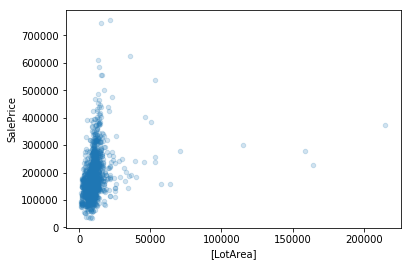

In [43]:
df.plot(x=features, y=target, kind='scatter', alpha=0.2);

### Test improvement if target is log-transformed

In [28]:
target = 'SalePrice'
features = ['LotArea']
y = np.log(df[target])
X = df[features]

run_log_linear_model(X, y)

Root Mean Squared Error: 167076.92900650037
R Squared: -149585627387.26697
Intercept: 11.930653929291942
LotArea    0.000009


### Kitchen Sink with cleaned numeric features

In [80]:
numeric = df.select_dtypes(include='number')
numeric = numeric.copy()

In [85]:
numeric['MasVnrArea'] = numeric['MasVnrArea'].fillna(0)
numeric['GarageYrBlt'] = numeric['GarageYrBlt'].fillna(0)
numeric['LotFrontage'] = numeric['LotFrontage'].fillna(0)

In [87]:
numeric.isnull().sum().sum()

0

In [92]:
target = 'SalePrice'
features = ['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']
y = numeric[target]
X = numeric[features]

run_linear_model(X, y)

Root Mean Squared Error: 36061.39606737944
R Squared: 0.8304603674991153
Intercept: -84812.89375776864
MSSubClass        -176.654624
LotFrontage        -18.073049
LotArea              0.394614
OverallQual      17812.415217
OverallCond       4546.658672
YearBuilt          340.268717
YearRemodAdd       155.676237
MasVnrArea          20.968044
BsmtFinSF1           8.565089
BsmtFinSF2          -1.705764
BsmtUnfSF           -0.590389
TotalBsmtSF          6.268937
1stFlrSF            11.584297
2ndFlrSF            14.524019
LowQualFinSF         4.259061
GrLivArea           30.367376
BsmtFullBath     10866.780087
BsmtHalfBath     -1058.443979
FullBath          3061.394917
HalfBath         -2272.668121
BedroomAbvGr     -9110.971930
KitchenAbvGr    -13314.979948
TotRmsAbvGrd      5091.363166
Fireplaces        4754.032393
GarageYrBlt        -14.076981
GarageCars       16456.287004
GarageArea           4.890747
WoodDeckSF          23.998209
OpenPorchSF         -9.250095
EnclosedPorch        9.6784

### Feature Engineering

Composite of total livable square feet of Property

In [96]:
numeric['total_living_sq'] = ( numeric['BsmtFinSF1'] + 
             numeric['BsmtFinSF2'] + 
             numeric['GrLivArea'] )  

In [98]:
target = 'SalePrice'
features = ['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold', 'total_living_sq']
y = numeric[target]
X = numeric[features]

run_linear_model(X, y)

Root Mean Squared Error: 36061.39606737906
R Squared: 0.830460367499119
Intercept: -84812.89375801935
MSSubClass          -176.654624
LotFrontage          -18.073049
LotArea                0.394614
OverallQual        17812.415217
OverallCond         4546.658672
YearBuilt            340.268717
YearRemodAdd         155.676237
MasVnrArea            20.968044
BsmtFinSF1             1.796598
BsmtFinSF2            -8.474255
BsmtUnfSF              6.178102
TotalBsmtSF           -0.499555
1stFlrSF               8.200051
2ndFlrSF              11.139773
LowQualFinSF           0.874815
GrLivArea             20.214639
BsmtFullBath       10866.780087
BsmtHalfBath       -1058.443979
FullBath            3061.394917
HalfBath           -2272.668121
BedroomAbvGr       -9110.971930
KitchenAbvGr      -13314.979948
TotRmsAbvGrd        5091.363166
Fireplaces          4754.032393
GarageYrBlt          -14.076981
GarageCars         16456.287004
GarageArea             4.890747
WoodDeckSF            23.998209
Op

Ratio of lot frontage to lot area

In [97]:
numeric['lot_frontage_to_area'] = numeric['LotFrontage'] / numeric['LotArea']

In [100]:
target = 'SalePrice'
features = ['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold','lot_frontage_to_area']
y = numeric[target]
X = numeric[features]

run_linear_model(X, y)

Root Mean Squared Error: 36052.21653735708
R Squared: 0.8305466700961687
Intercept: -87847.51354753823
MSSubClass               -175.643507
LotFrontage               -14.446548
LotArea                     0.391229
OverallQual             17808.677425
OverallCond              4548.192099
YearBuilt                 340.177127
YearRemodAdd              155.642573
MasVnrArea                 20.977784
BsmtFinSF1                  8.562311
BsmtFinSF2                 -1.708815
BsmtUnfSF                  -0.575133
TotalBsmtSF                 6.278369
1stFlrSF                   11.559589
2ndFlrSF                   14.525208
LowQualFinSF                4.241329
GrLivArea                  30.326122
BsmtFullBath            10854.387627
BsmtHalfBath            -1057.035556
FullBath                 3076.032752
HalfBath                -2278.984950
BedroomAbvGr            -9130.356769
KitchenAbvGr           -13362.767929
TotRmsAbvGrd             5090.627747
Fireplaces               4738.782971
GarageYrB

Years before renovation

In [101]:
numeric['years_before_renovation'] = numeric['YearRemodAdd'] - numeric['YearBuilt']

In [104]:
target = 'SalePrice'
features = ['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold','lot_frontage_to_area', 'years_before_renovation']
y = numeric[target]
X = numeric[features]

run_linear_model(X, y)

Root Mean Squared Error: 36052.216537357155
R Squared: 0.830546670096168
Intercept: -87847.51354735417
MSSubClass                  -175.643507
LotFrontage                  -14.446548
LotArea                        0.391229
OverallQual                17808.677425
OverallCond                 4548.192099
YearBuilt                    278.665610
YearRemodAdd                 217.154091
MasVnrArea                    20.977784
BsmtFinSF1                     8.562313
BsmtFinSF2                    -1.708813
BsmtUnfSF                     -0.575131
TotalBsmtSF                    6.278367
1stFlrSF                      11.559591
2ndFlrSF                      14.525209
LowQualFinSF                   4.241331
GrLivArea                     30.326121
BsmtFullBath               10854.387627
BsmtHalfBath               -1057.035556
FullBath                    3076.032752
HalfBath                   -2278.984950
BedroomAbvGr               -9130.356769
KitchenAbvGr              -13362.767929
TotRmsAbvGrd     

Age of house

In [108]:
numeric['house_age'] = 2015 - numeric['YearBuilt']

In [121]:
target = 'SalePrice'
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath',
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
 'MoSold', 'YrSold','lot_frontage_to_area', 'years_before_renovation', 
 'house_age']
y = numeric[target]
X = numeric[features]

run_linear_model(X, y)

Root Mean Squared Error: 36052.21653735775
R Squared: 0.8305466700961623
Intercept: 249059.20653766763
MSSubClass                  -175.643507
LotFrontage                  -14.446548
LotArea                        0.391229
OverallQual                17808.677425
OverallCond                 4548.192099
YearBuilt                    167.199367
YearRemodAdd                 161.420968
MasVnrArea                    20.977784
BsmtFinSF1                     8.562312
BsmtFinSF2                    -1.708815
BsmtUnfSF                     -0.575133
TotalBsmtSF                    6.278369
1stFlrSF                      11.559589
2ndFlrSF                      14.525207
LowQualFinSF                   4.241329
GrLivArea                     30.326123
BsmtFullBath               10854.387627
BsmtHalfBath               -1057.035556
FullBath                    3076.032752
HalfBath                   -2278.984950
BedroomAbvGr               -9130.356769
KitchenAbvGr              -13362.767929
TotRmsAbvGrd     

Ratio of Square Feet to baths

In [139]:
baths = numeric['FullBath'] + numeric['HalfBath']
numeric['baths_to_sqft'] = (baths / numeric['total_living_sq'])

In [140]:
numeric['baths_to_sqft'].max()

0.0029940119760479044

In [141]:
target = 'SalePrice'
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath',
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
 'MoSold', 'YrSold','lot_frontage_to_area', 'years_before_renovation', 
 'house_age', 'baths_to_sqft']
y = numeric[target]
X = numeric[features]

run_linear_model(X, y)

Root Mean Squared Error: 36099.99216338991
R Squared: 0.8300972606646506
Intercept: 317173.7094340398
MSSubClass                -1.500952e+02
LotFrontage                7.296108e+00
LotArea                    4.645754e-01
OverallQual                1.735166e+04
OverallCond                4.066835e+03
YearBuilt                  1.689620e+02
YearRemodAdd               1.722281e+02
MasVnrArea                 1.951246e+01
BsmtFinSF1                 1.422996e+00
BsmtFinSF2                -1.028434e+01
BsmtUnfSF                  8.682132e+00
TotalBsmtSF               -1.470952e-01
1stFlrSF                   7.461460e+00
2ndFlrSF                   8.688629e+00
LowQualFinSF               2.023247e+00
GrLivArea                  1.789891e+01
BsmtFullBath               7.262907e+03
BsmtHalfBath              -3.626914e+03
FullBath                   2.499996e+04
HalfBath                   1.987993e+04
BedroomAbvGr              -1.089145e+04
KitchenAbvGr              -1.243771e+04
TotRmsAbvGrd      

In [163]:
numeric['YrSold-2006'] = numeric['YrSold'] - 2006

## Interaction Feature

In [147]:
numeric['sqft*rooms'] = numeric['TotRmsAbvGrd'] * numeric['GrLivArea']

In [148]:
target = 'SalePrice'
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath',
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
 'MoSold', 'YrSold','lot_frontage_to_area', 'years_before_renovation', 
 'house_age', 'OverallQual ** 3', 'OverallCond ** 3', 'sqft*rooms']
y = numeric[target]
X = numeric[features]

run_linear_model(X, y)

Root Mean Squared Error: 32523.92058828666
R Squared: 0.8620912094400875
Intercept: 760606.2295277106
MSSubClass                  -146.260636
LotFrontage                  -37.219135
LotArea                        0.425572
OverallQual               -18738.524335
OverallCond                11341.612537
YearBuilt                    202.972651
YearRemodAdd                 165.830204
MasVnrArea                    10.108813
BsmtFinSF1                     6.357584
BsmtFinSF2                     1.489190
BsmtUnfSF                     -0.307728
TotalBsmtSF                    7.539046
1stFlrSF                      13.534136
2ndFlrSF                      21.469878
LowQualFinSF                  13.739096
GrLivArea                     48.743109
BsmtFullBath               11997.165356
BsmtHalfBath                1611.273402
FullBath                    3773.180964
HalfBath                   -2104.850082
BedroomAbvGr               -4260.075876
KitchenAbvGr              -13832.541801
TotRmsAbvGrd      

## Polynomial Features

In [107]:
numeric['OverallQual ** 3'] = numeric['OverallQual'] ** 3

In [112]:
numeric['OverallCond ** 3'] = numeric['OverallCond'] ** 3

In [145]:
target = 'SalePrice'
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath',
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
 'MoSold', 'YrSold','lot_frontage_to_area', 'years_before_renovation', 
 'house_age', 'OverallQual ** 3', 'OverallCond ** 3']
y = numeric[target]
X = numeric[features]

run_linear_model(X, y)

Root Mean Squared Error: 32063.632174211143
R Squared: 0.8659670422830523
Intercept: 695572.4228781541
MSSubClass                  -153.480109
LotFrontage                  -46.842889
LotArea                        0.433572
OverallQual               -15452.293206
OverallCond                11339.262266
YearBuilt                    197.583369
YearRemodAdd                 171.580225
MasVnrArea                     9.491654
BsmtFinSF1                     5.032229
BsmtFinSF2                     1.374863
BsmtUnfSF                     -0.322833
TotalBsmtSF                    6.084257
1stFlrSF                      10.755522
2ndFlrSF                      15.373413
LowQualFinSF                  -0.546688
GrLivArea                     25.582253
BsmtFullBath               12539.933195
BsmtHalfBath                2044.857820
FullBath                    5017.990440
HalfBath                    -534.410251
BedroomAbvGr               -3745.001058
KitchenAbvGr              -13150.878152
TotRmsAbvGrd     

## Additional Polynomial Features

Emphasize the house_age

In [158]:
numeric['house_age**3'] = numeric['house_age'] ** 3

In [166]:
target = 'SalePrice'
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath',
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
 'MoSold', 'YrSold','lot_frontage_to_area', 'years_before_renovation', 
 'OverallQual ** 3', 'OverallCond ** 3', 'house_age**3', 'YrSold-2006']
y = numeric[target]
X = numeric[features]

run_linear_model(X, y)

Root Mean Squared Error: 32060.563860752143
R Squared: 0.865992693491153
Intercept: -402474.2061197278
MSSubClass                  -153.743551
LotFrontage                  -47.021581
LotArea                        0.434266
OverallQual               -15481.184845
OverallCond                11359.220010
YearBuilt                    337.212950
YearRemodAdd                 239.387681
MasVnrArea                     9.580046
BsmtFinSF1                     5.010716
BsmtFinSF2                     1.428827
BsmtUnfSF                     -0.380460
TotalBsmtSF                    6.059033
1stFlrSF                      10.829775
2ndFlrSF                      15.323900
LowQualFinSF                  -0.563824
GrLivArea                     25.589878
BsmtFullBath               12536.485029
BsmtHalfBath                2077.478805
FullBath                    4976.437178
HalfBath                    -517.453845
BedroomAbvGr               -3707.960257
KitchenAbvGr              -13143.966013
TotRmsAbvGrd     

Test with eliminating features with low correlation to target (both positive and negative)

In [160]:
target = 'SalePrice'
features = ['LotFrontage', 'LotArea', 'OverallQual',
 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'GrLivArea',
 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 'ScreenPorch', 'PoolArea', 'total_living_sq',
 'lot_frontage_to_area', 'years_before_renovation', 
 'house_age', 'OverallQual ** 3', 'sqft*rooms','house_age**3']
y = numeric[target]
X = numeric[features]

run_linear_model(X, y)

Root Mean Squared Error: 33578.52095387382
R Squared: 0.8530027225708791
Intercept: -502543.87393165857
LotFrontage                    46.453700
LotArea                         0.391840
OverallQual                -13889.406980
YearBuilt                      75.427953
YearRemodAdd                  218.041007
MasVnrArea                      9.128587
BsmtFinSF1                      6.289493
BsmtUnfSF                       9.974774
TotalBsmtSF                    -1.940181
1stFlrSF                       19.630150
2ndFlrSF                       23.204852
GrLivArea                      24.210971
BsmtFullBath                 9183.347635
FullBath                     3268.488283
HalfBath                    -1961.292683
BedroomAbvGr                -3333.558031
KitchenAbvGr               -26593.797335
TotRmsAbvGrd                 8957.850338
Fireplaces                   5319.472682
GarageYrBlt                    -6.513988
GarageCars                  15080.976047
GarageArea                      0.5

## Feature Correlation Heatmap

In [149]:
import seaborn as sns

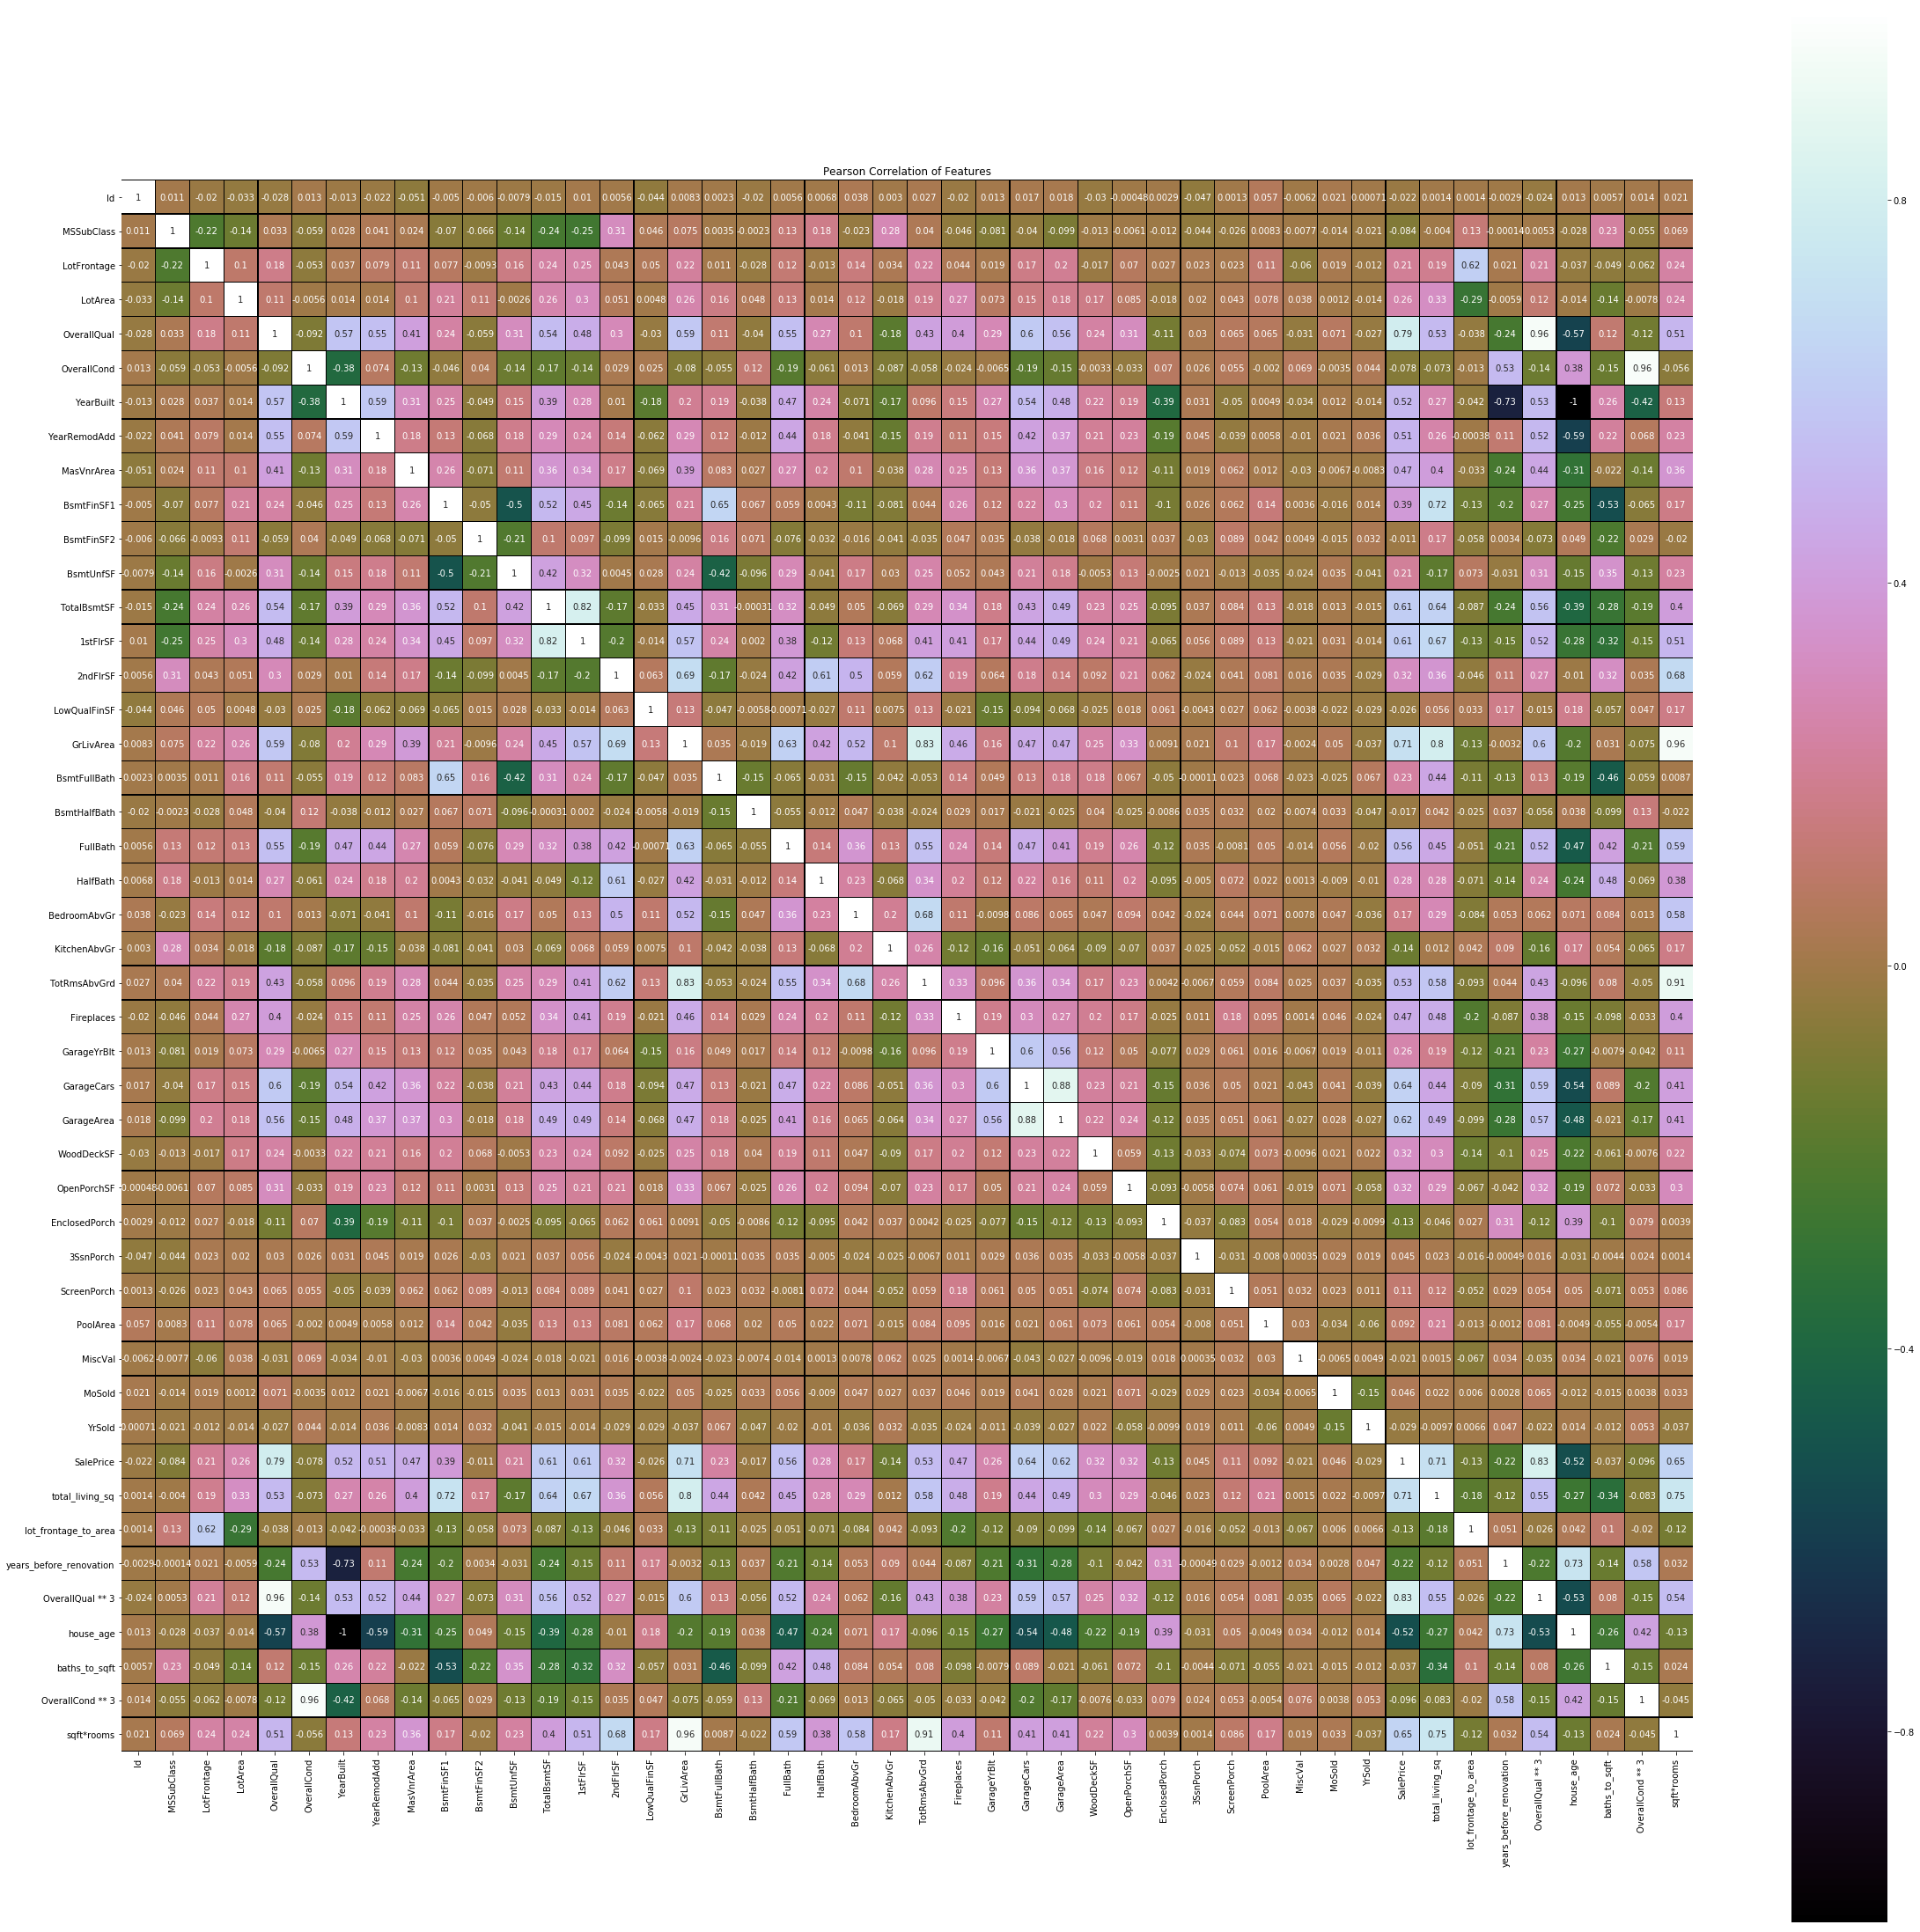

In [157]:
fig, ax = plt.subplots(figsize=(40,40))
plt.title('Pearson Correlation of Features')

sns_plot = sns.heatmap(numeric.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)
fig = sns_plot.get_figure()
fig.savefig("corr_matrix.png")

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data